### Źródło danych: 


Do projektu została wykorzystana baza danych pobrana ze strony Kaggle i jest dostępna pod adresem: https://www.kaggle.com/datasets/brijlaldhankour/car-buyers
<br>
Zbiór jest rejestrem 6092 rekordów dotyczących sprzedaży 501 modeli samochodów.
<br>
W naszej analizie wykorzystamy następujące kolumny z podanej bazy danych:
<ul>
    <li>Manufacturer - Producent</li>
    <li>Model - Model</li>
    <li>Price - Cena</li>
    <li>Power - Moc (w KM)</li>
    <li>Engine CC - Pojemność silnika w cm^3</li>
    <li>Fuel - Rodzaj paliwa</li>
    <li>Male - Ilość kupiona przez mężczyzn</li>
    <li>Female- Ilość kupiona przez kobiety</li>
    <li>Unknown - Ilość kupiona przez płeć nieznaną</li>
    <li>Total - Suma sprzedaży danego modelu</li>
</ul>

### Wczytanie i obróbka danych

Import Bibliotek

In [108]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

Wczytanie danych

In [109]:
dataSet = pd.read_csv("CarBuyers.csv")

Usunięcie niepotrzebnej kolumny

In [110]:
dataSet.drop("Transmission", axis="columns", inplace= True)

Przejrzenie zawartości bazy danych

In [111]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  6092 non-null   object 
 1   Model         6092 non-null   object 
 2   Price         6092 non-null   float64
 3   Power         6092 non-null   float64
 4   Engine CC     6092 non-null   float64
 5   Fuel          6092 non-null   object 
 6   Male          6092 non-null   object 
 7   Female        6092 non-null   object 
 8   Unknown       6092 non-null   object 
 9   Total         6092 non-null   object 
dtypes: float64(3), object(7)
memory usage: 476.1+ KB


In [112]:
dataSet.head()

,Manufacturer,Model,Price,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Ford,Focus,30.619322,94.033898,1497.169492,petrol,814172,422731,"56,487",1293390
1,Ford,Fiesta,18.532143,68.571429,1166.142857,petrol,554879,631666,"54,057",1240602
2,Volkswagen,Golf,31.242154,89.461538,1537.406593,petrol,483216,310604,"47,563",841383
3,Renault,Clio,22.100000,75.576923,1219.653846,petrol,241287,312556,"28,004",581847
4,BMW,320i,47.848370,126.111111,1995.777778,petrol,408016,115843,"29,125",552984


Elementy kolumn `Male, Female, Unknow, Total` mają typ `object` oraz zawierają w sobie przecinki. Aby umożliwić w dalszej części analizę tych elementów jako liczb usuniemy z nich przecinki i zmienimy typ na `int`

In [113]:
columnsToChange = ["Male", "Female", "Unknown", "Total"]
for i in range(len(dataSet)):
    for column in columnsToChange:
        stringWithoutComma = str(dataSet.loc[i, column]).replace(",","")
        dataSet.loc[i, column] = stringWithoutComma

dataSet = dataSet.astype({"Fuel": "str", "Male": "int", "Female": "int", "Unknown": "int", "Total": "int"})
dataSet.info() #sprawdzamy czy typy zmieniono na int


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6092 entries, 0 to 6091
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  6092 non-null   object 
 1   Model         6092 non-null   object 
 2   Price         6092 non-null   float64
 3   Power         6092 non-null   float64
 4   Engine CC     6092 non-null   float64
 5   Fuel          6092 non-null   object 
 6   Male          6092 non-null   int32  
 7   Female        6092 non-null   int32  
 8   Unknown       6092 non-null   int32  
 9   Total         6092 non-null   int32  
dtypes: float64(3), int32(4), object(3)
memory usage: 380.9+ KB


Baza posiada rozbite rekordy sprzedaży, więc sumujemy wszystkie sprzedaże do jednego rekordu.

In [114]:
dataSetUnique = pd.DataFrame()
for column in dataSet.columns:
    dataSetUnique[column]=[]
#dataSetUnique.loc[0] = dataSet.loc[0]
listOfModels = []

indexForNewRow = 0

for i in range(0, len(dataSet)):
    row = dataSet.loc[i]
    model = row["Model"]
    if model in listOfModels:
        index = listOfModels.index(row["Model"])
        dataSetUnique.loc[index, "Male"] += row["Male"]
        
    else:
        listOfModels.append(row["Model"])
        dataSetUnique.loc[indexForNewRow]=row
        indexForNewRow += 1

dataSet = dataSetUnique
dataSet



,Manufacturer,Model,Price,Power,Engine CC,Fuel,Male,Female,Unknown,Total
0,Ford,Focus,30.619322,94.033898,1497.169492,petrol,7221769,422731,56487,1293390
1,Ford,Fiesta,18.532143,68.571429,1166.142857,petrol,12150919,631666,54057,1240602
2,Volkswagen,Golf,31.242154,89.461538,1537.406593,petrol,7339526,310604,47563,841383
3,Renault,Clio,22.1,75.576923,1219.653846,petrol,3929068,312556,28004,581847
4,BMW,320i,47.84837,126.111111,1995.777778,petrol,6213366,115843,29125,552984
...,...,...,...,...,...,...,...,...,...,...
496,Honda,Quintet,4.968,59.0,1602.0,petrol,3050,331,44,1099
497,Renault,14,9.18075,46.75,1324.5,petrol,2120,423,37,1229
498,Renault,20,9.9475,73.5,1908.0,petrol,2400,196,30,1151
499,Lada,1200,4.536,44.0,1198.0,petrol,1295,361,26,1682


W kolumnie `Fuel` znajduje się kilka rekordów `automatic`, które miały oznaczać że samochód posiada silnik hybrydowy. Żeby uniknąć nieporozumień zmienimy to na `hybrid`.

In [126]:
listOfFuels = dataSet["Fuel"].to_list()
listOfFuels = [fuel.replace("automatic", "hybrid") for fuel in listOfFuels]
dataSet["Fuel"] = listOfFuels

### Analiza bazy danych

#### Analiza podstawowa

Statystyki elementów numerycznych

In [116]:
numericColumns = ["Price", "Power", "Engine CC", "Male", "Female", "Unknown", "Total"]
dataSet[numericColumns].astype(int).describe()

,Price,Power,Engine CC,Male,Female,Unknown,Total
count,501.000000,501.000000,501.000000,5.010000e+02,501.000000,501.000000,5.010000e+02
mean,41.065868,112.411178,1969.640719,4.003529e+05,16253.788423,2201.534930,4.208710e+04
std,49.524960,70.803126,869.323633,1.137911e+06,50512.208564,5804.470311,1.155922e+05
min,3.000000,15.000000,0.000000,6.050000e+02,37.000000,13.000000,1.003000e+03
25%,18.000000,70.000000,1452.000000,1.869500e+04,366.000000,68.000000,1.574000e+03
50%,29.000000,94.000000,1796.000000,7.393200e+04,1697.000000,325.000000,6.784000e+03
75%,43.000000,123.000000,2234.000000,2.494550e+05,9131.000000,1547.000000,2.969700e+04
max,646.000000,450.000000,6208.000000,1.215092e+07,631666.000000,56487.000000,1.293390e+06


#### Rankingi

Ranking samochodów względem mocy silnika

In [117]:
ranking = dataSet.sort_values("Power", ascending=False).head().drop(["Male", "Female", "Unknown", "Total"], axis="columns")
ranking

,Manufacturer,Model,Price,Power,Engine CC,Fuel
383,Porsche,Carrera,646.605,450.0,5733.0,petrol
370,Audi,RS6,175.835,433.5,4493.5,petrol
219,Bentley,Continental,285.247,428.2,5577.8,petrol
176,Mercedes,SLS,264.675,420.0,6208.0,petrol
386,Nissan,GT-R,177.5,419.0,3799.0,petrol


Ranking smaochodów względem pojemności silnika

In [118]:
ranking = dataSet.sort_values("Engine CC", ascending=False).head().drop(["Male", "Female", "Unknown", "Total"], axis="columns")
ranking

,Manufacturer,Model,Price,Power,Engine CC,Fuel
176,Mercedes,SLS,264.675,420.0,6208.0,petrol
480,Daimler,Double,106.82,234.0,5993.0,petrol
288,Aston-Martin,DB9,273.755,381.0,5935.0,petrol
383,Porsche,Carrera,646.605,450.0,5733.0,petrol
219,Bentley,Continental,285.247,428.2,5577.8,petrol


Najdroższe modele

In [119]:
ranking = dataSet.sort_values("Price", ascending=False).head().drop(["Fuel", "Unknown", "Total"], axis="columns")
ranking

,Manufacturer,Model,Price,Power,Engine CC,Male,Female
383,Porsche,Carrera,646.605,450.0,5733.0,25353,83
272,Aston-Martin,Vantage,360.755,410.0,5341.0,25375,359
219,Bentley,Continental,285.247,428.2,5577.8,52397,1024
288,Aston-Martin,DB9,273.755,381.0,5935.0,24625,305
176,Mercedes,SLS,264.675,420.0,6208.0,143077,3121


#### Wykresy

Wykres ilości modeli danej marki

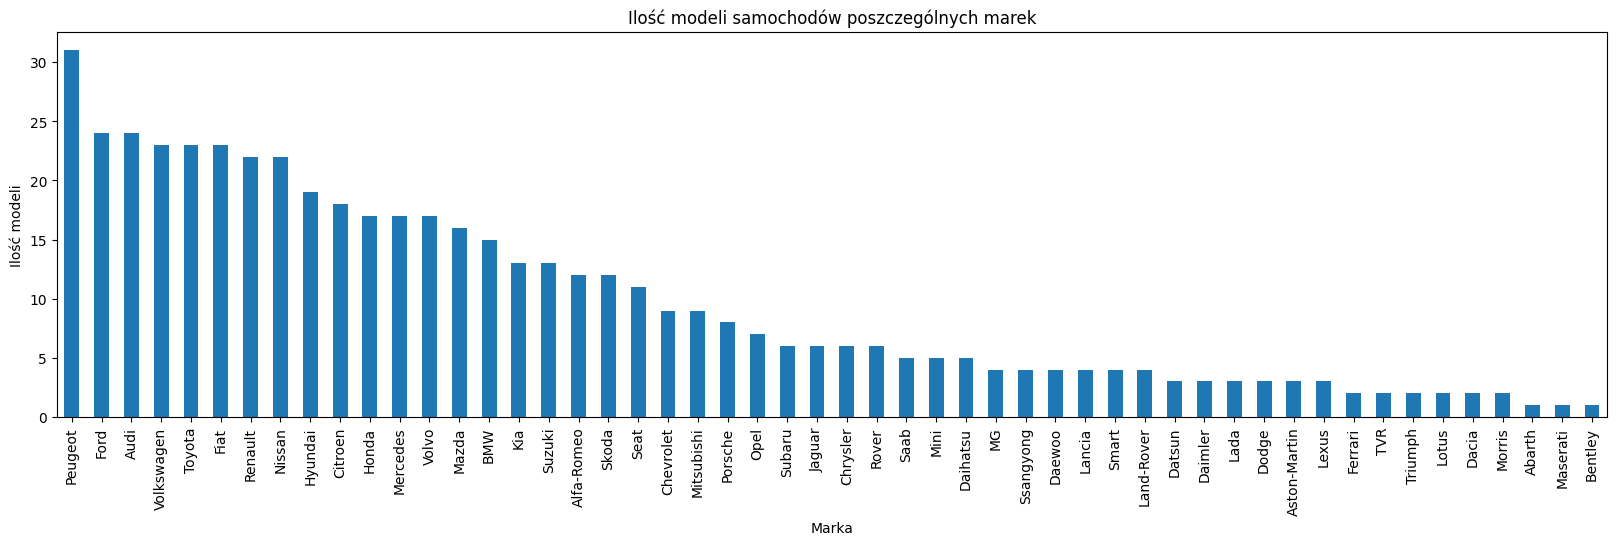

In [120]:
chart = dataSet["Manufacturer"].value_counts()

chart.plot.bar(title="Ilość modeli samochodów poszczególnych marek", figsize=(20,5), xlabel="Marka", ylabel="Ilość modeli")

plt.show()


Wykres sprzedaży dla każdej płci (liczbowo i procentowo)

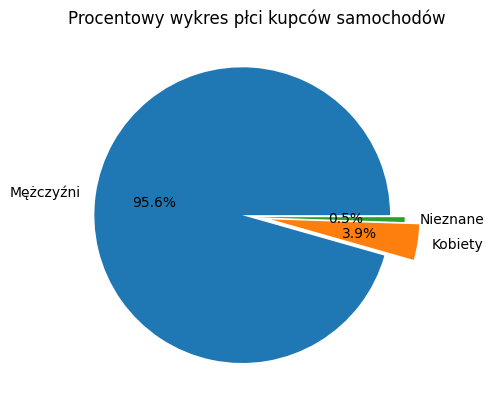

In [121]:
sums = [dataSet["Male"].sum(), dataSet["Female"].sum(), dataSet["Unknown"].sum()]
labels = ["Mężczyźni", "Kobiety", "Nieznane"]

plt.title("Procentowy wykres płci kupców samochodów")
plt.pie(sums, labels=labels, autopct='%1.1f%%', explode=(0.1, 0.1, 0))
plt.show()

Marki najczęściej wybierane przez mężczyzn (top 5)

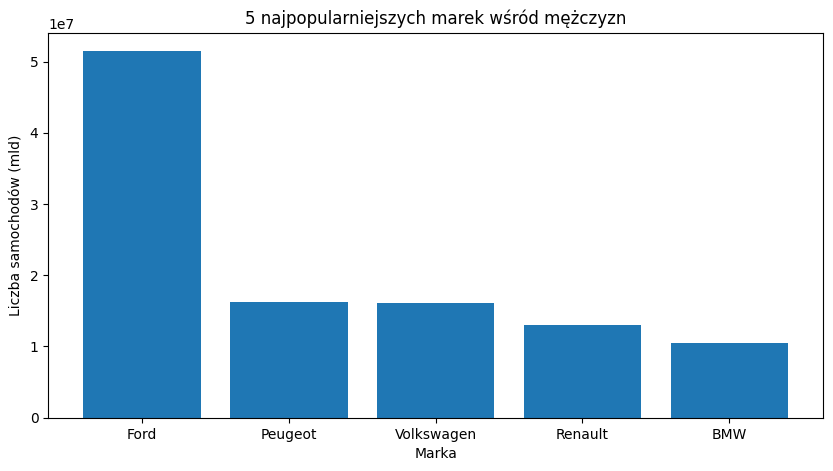

In [122]:
listOfUniqueBrands = dataSet["Manufacturer"].unique().tolist()

for i in range(len(listOfUniqueBrands)):
    brand = listOfUniqueBrands[i]
    rowsWithBrand = dataSet[dataSet["Manufacturer"]==brand] #rzedy danej marki
    sum = rowsWithBrand["Male"].sum() #sumujemy ilosc samochodow danej marki kupionej przez mezczyzn
    brand = [brand]
    brand.append(sum)
    listOfUniqueBrands[i] = brand


topFiveBrands = sorted(listOfUniqueBrands, reverse=True, key=lambda x: x[1])[:5]

x_values, y_values = zip(*topFiveBrands)


fig, axes = plt.subplots(figsize=(10,5))
plt.title("5 najpopularniejszych marek wśród mężczyzn")
plt.bar(x_values, y_values)
plt.xlabel("Marka")
plt.ylabel("Liczba samochodów (mld)")

plt.show()


Marki najczęściej wybierane przez kobiety

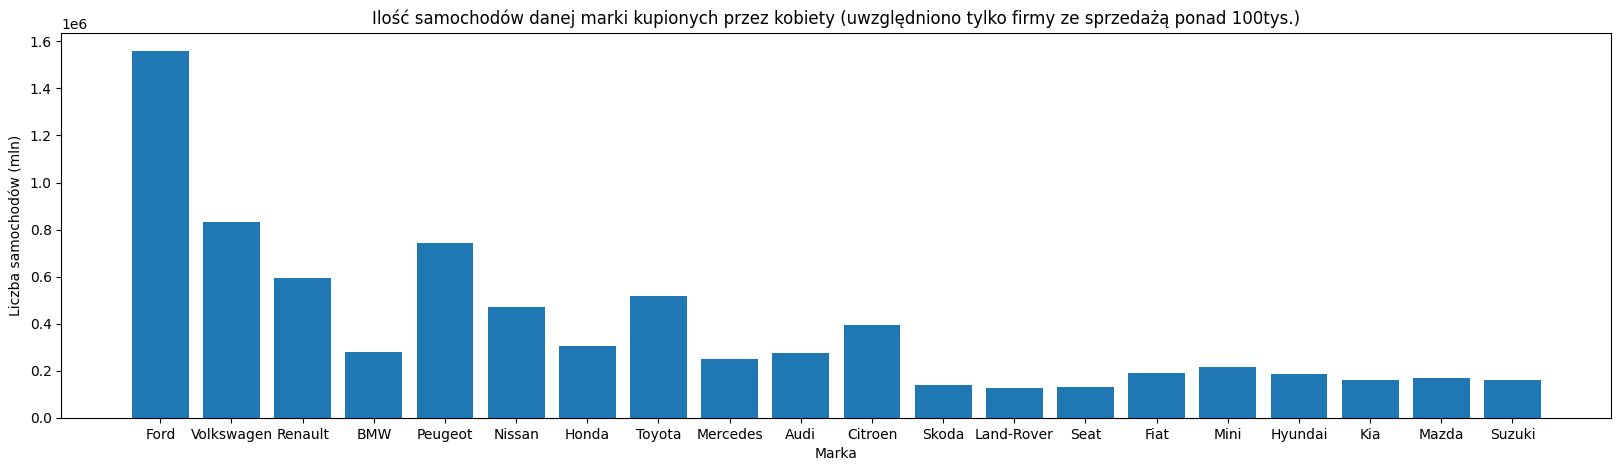

In [123]:
listOfUniqueBrands = dataSet["Manufacturer"].unique().tolist()
numberOfCarsBought = []
indexesToErase = []
for brand in listOfUniqueBrands:
    rowsWithBrand = dataSet[dataSet["Manufacturer"]==brand] #rzedy danej marki
    sum = rowsWithBrand["Female"].sum() #sumujemy ilosc samochodow danej marki kupionej przez kobiety

    if sum>0.1e6: #wylonienie indeksow do usuniecia
        numberOfCarsBought.append(sum) 
    else:
        indexesToErase.append(listOfUniqueBrands.index(brand))

for index in sorted(indexesToErase, reverse=True):
    del listOfUniqueBrands[index]

fig, axes = plt.subplots(figsize=(20,5))

plt.title("Ilość samochodów danej marki kupionych przez kobiety (uwzględniono tylko firmy ze sprzedażą ponad 100tys.)")
plt.bar(x=listOfUniqueBrands, height=numberOfCarsBought)
plt.ylabel("Liczba samochodów (mln)")
plt.xlabel("Marka")

plt.show()

Wnioski: jak można zobaczyć na dwóch powyższych wykresach, ford jest najpopularniejszą marką zarówno wśród kobiet jak i wśród mężczyzn. Warto także znaczną przewagę nad drugim miejscem (w przypadku kobiet Ford zanotował ~2 razy więcej sprzedaży, a w przypadku mężczyzn aż blisko 3 razy)

Które marki sprzedały najwięcej samochodów? Top 10

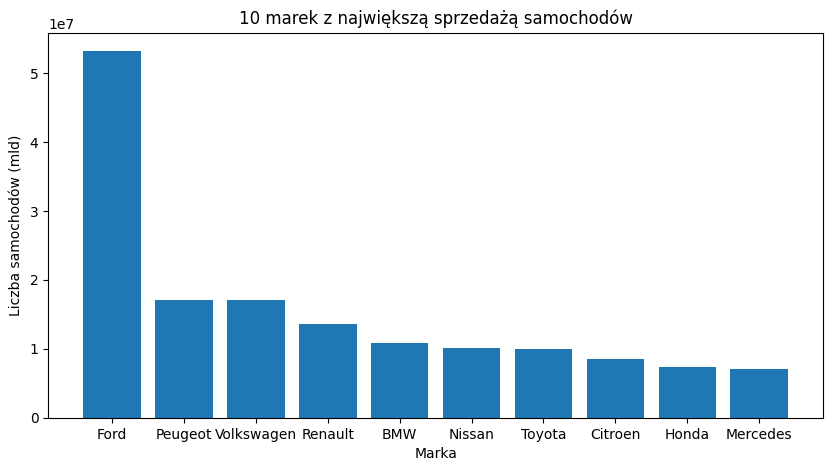

In [124]:
listOfUniqueBrands = dataSet["Manufacturer"].unique().tolist()

for i in range(len(listOfUniqueBrands)):
    brand = listOfUniqueBrands[i]
    rowsWithBrand = dataSet[dataSet["Manufacturer"]==brand] #rzedy danej marki
    sum = rowsWithBrand["Male"].sum() + rowsWithBrand["Female"].sum() + rowsWithBrand["Unknown"].sum() #sumujemy ilosc samochodow danej marki
    brand = [brand]
    brand.append(sum)
    listOfUniqueBrands[i] = brand

topFiveBrands = sorted(listOfUniqueBrands, reverse=True, key=lambda x: x[1])[:10]

x_values, y_values = zip(*topFiveBrands)


fig, axes = plt.subplots(figsize=(10,5))
plt.title("10 marek z największą sprzedażą samochodów")
plt.bar(x_values, y_values)
plt.xlabel("Marka")
plt.ylabel("Liczba samochodów (mld)")

plt.show()

Najczęściej sprzedawane modele

Procentowe przedstawienie wykorzystywanego rodzaju paliwa

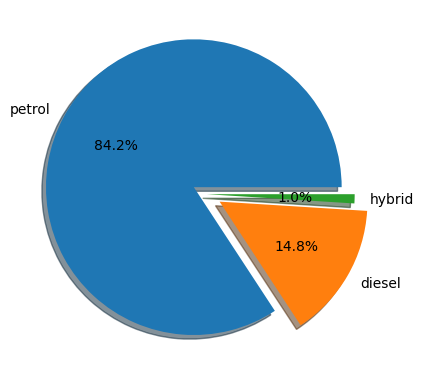

In [125]:
fuel = dataSet["Fuel"].value_counts()
#plt.pie(fuel.keys(), labels=fuel.values)
plt.pie(fuel.values, labels=fuel.keys().to_list(), autopct='%1.1f%%', explode=(0.1, 0.1, 0), shadow=True)
plt.show()